# **Урок 3. Изменение таблиц в Pandas**
---
### *`Условие 1:`*

- *Скачать данные из прошлого семинара(дома)*
- *Считать данные с помощью pandas*
- *Вывести на экран первые 5 строк*

In [1]:
import pandas as pd 

df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


> ## **Создать новый признак **`delta_renovated`**, который будет содержать разницу в годах между годом реновацией дома и годом постройки дома, если реновации дома не было, то в новом признаке поставьте 0**

In [2]:
class Delta:
    def __init__(self, col1, col2):
        self.col1 = col1
        self.col2 = col2
    
    def create_delta_renovated(self, df):
        df['delta_renovated'] = df.apply(lambda x: x[self.col1] - x[self.col2] if x[self.col1] != 0 else 0, axis=1)
        return df


delta = Delta('yr_renovated', 'yr_built')
df = delta.create_delta_renovated(df)
display(df['delta_renovated'].unique())
df.head()

array([  0,  40,  72,  45,  60,  99,  78,  97,  74,  34,  63, 101,  26,
        49,  89,  62,  51, 110, 102,  27,  38,  22,  53,  85,  31,  77,
        93,  18,  66,  21,  91,  75,  44,  28,  48,  46,  29,  58,  70,
        32,  56,  65,  47,  57,   9,  35,  82,  76,  61,  59,  87,  30,
        86, 108, 103,  79,  12,  37,  98,  16,  69,  94,  33,  43,  39,
        88,  71, 109, 114,  81,  84,  64, 104,  68,  90,  83,  41,  73,
        52,  36,  24, 105,  67,  15,  55,  42,  25,  17,   8,  50,  19,
        23,  54,  20,  80,  96, 100,  95,  92, 113,  11,   6,  14,  13,
       107,  10], dtype=int64)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,40
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


> ## **Создайте признаки года продажи, месяца продажи**

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month_name()
display(f"Уникальные значения месяца продажи: {df['month_sold'].unique()}")
display(f"Уникальные значения года продажи: {df['year_sold'].unique()}")
df.head()

"Уникальные значения месяца продажи: ['October' 'December' 'February' 'May' 'June' 'January' 'April' 'March'\n 'July' 'August' 'November' 'September']"

'Уникальные значения года продажи: [2014 2015]'

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,October
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,40,2014,December
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,February
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0,2014,December
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,February


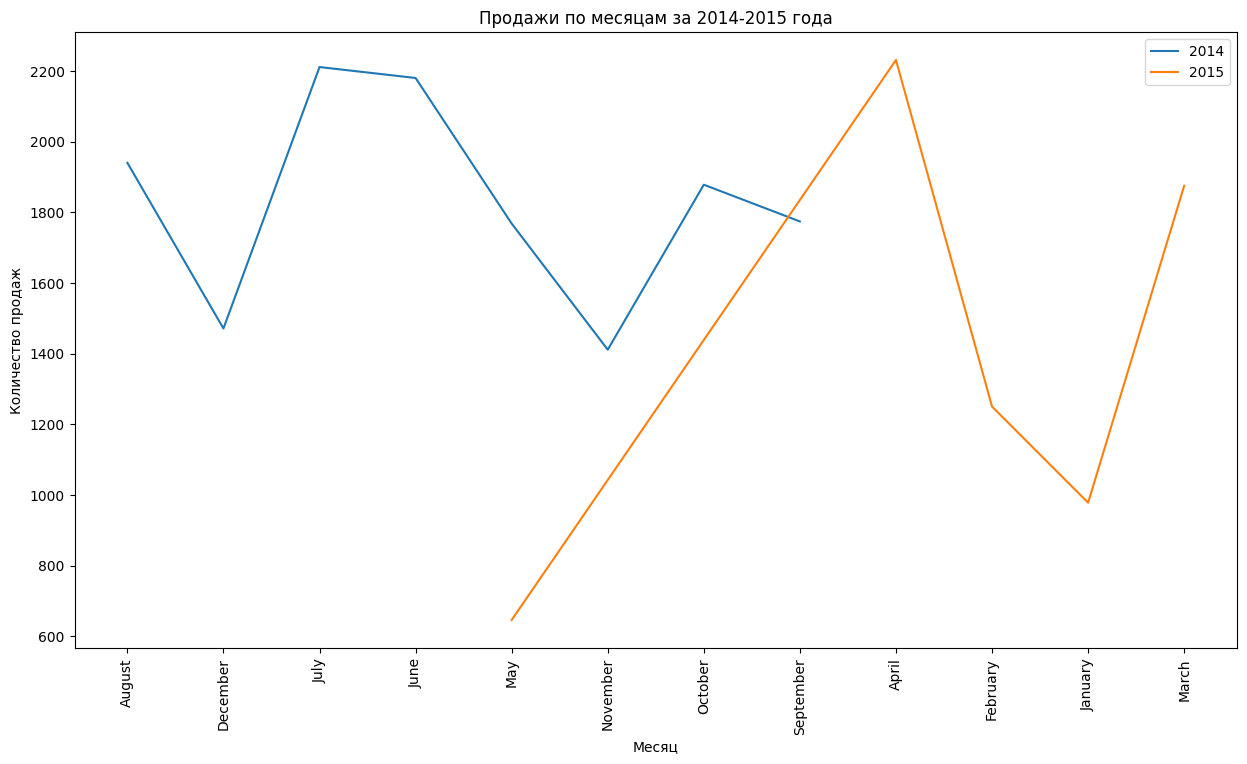

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_month_2014 = df[df['year_sold'] == 2014].groupby('month_sold').count()
sales_by_month_2015 = df[df['year_sold'] == 2015].groupby('month_sold').count()


fig, ax = plt.subplots(figsize=(15,8))


sns.lineplot(data=sales_by_month_2014, x=sales_by_month_2014.index, y='price', ax=ax, label='2014')
sns.lineplot(data=sales_by_month_2015, x=sales_by_month_2015.index, y='price', ax=ax, label='2015')


ax.set_title('Продажи по месяцам за 2014-2015 года')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество продаж')
plt.xticks(rotation=90)
plt.show()


### **Из этих данных мы можем заметить:**
- *Все дома из таблицы проданы за 2014 и 2015 года*
- *За 2014 год в общей сложности было продано больше домов, чем за 2015*
- *В зимние месяца продажи очень сильно проседают за оба года, а вот летом и весной продажи идут очень хорошо.*
- *Пик продаж был достигнут в 2015 году в Апрель, а в 2014 пика достигли в Июль.*
- *Минимальное количество продаж пришлось на Май 2015-ого года.*

> ## **Удалите признаки **`date`**, **`zipcode`**, **`lat`**, **`long`****

In [5]:
class Droppy:
    def __init__(self, df, columns_to_drop):
        self.df = df
        self.columns_to_drop = columns_to_drop
    
    def drop_columns(self):
        self.df = self.df.drop(self.columns_to_drop, axis=1)
        return self.df


droppy = Droppy(df, ['date', 'zipcode', 'lat', 'long'])
df = droppy.drop_columns()
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,2014,October
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,40,2014,December
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,2015,February
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,2014,December
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,2015,February


### *`Условие 2:`*

> ## **Создайте датафрейм с клиентами**

In [6]:
clients = pd.DataFrame({'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
                                      939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
                                      2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
                        'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
                                     1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
                                     5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
                                     5083000375, 7920100025, 1951600150, 809001400, 339600110,
                                     1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
                                     8861700030, 3303980210, 7731100066, 8146100580, 825069097,
                                     3889100029, 9524100196]})

> ## **Присоедините к таблице `clients` данные по домам через метод `join`**

In [7]:
client_join = clients.join(df)
print('Датафрейм clients:')
display(client_join.head())
print('Датафрейм df')
display(df.head())
print('Количество пропущенных значений датафрейма clients')
client_join.isna().sum()

Датафрейм clients:


,client_id,house_id,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year_sold,month_sold
0,1459,8965450190,7129300520,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,1340,5650,0,2014,October
1,4684,6823100225,6414100192,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,1690,7639,40,2014,December
2,3498,5104540330,5631500400,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,2720,8062,0,2015,February
3,3942,2131701075,2487200875,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,1360,5000,0,2014,December
4,4535,1522700060,1954400510,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,1800,7503,0,2015,February


Датафрейм df


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,2014,October
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,40,2014,December
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,2015,February
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,2014,December
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,2015,February


Количество пропущенных значений датафрейма clients


client_id          0
house_id           0
id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
sqft_living15      0
sqft_lot15         0
delta_renovated    0
year_sold          0
month_sold         0
dtype: int64

*Как мы можем заметить, в датафрейме `df` изменений не произошло, объединение коснулось только датафрейма `clients`*

> ## **Присоедините к таблице `clients` данные по домам через метод merge**
*Это нужно, чтобы понимать, какие дома покупались клиентами*

*`house_id` - это индексы датафрейма с домами*

In [8]:
client_merge = clients.merge(df, left_on='house_id', right_on='id')
print('Датафрейм clients:')
display(client_merge.head())
print('Датафрейм df')
display(df.head())
print('Количество пропущенных значений датафрейма clients')
client_merge.isna().sum()

Датафрейм clients:


,client_id,house_id,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year_sold,month_sold
0,1459,8965450190,8965450190,295000.0,3,2.50,1500,3060,2.0,0,...,7,1500,0,1994,0,2700,7734,0,2015,February
1,4684,6823100225,6823100225,700000.0,4,1.75,1870,6000,1.0,0,...,8,1670,200,1949,0,1710,6000,0,2015,April
2,3498,5104540330,5104540330,679000.0,4,2.50,3680,7236,2.0,0,...,10,3680,0,2006,0,3310,7180,0,2015,May
3,3942,2131701075,2131701075,420000.0,3,1.75,1720,5000,1.5,0,...,8,1720,0,1932,2009,1410,8300,77,2014,December
4,4535,1522700060,1522700060,518000.0,4,2.75,2520,14021,2.0,0,...,9,2520,0,1999,0,2330,14007,0,2014,June


Датафрейм df


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,2014,October
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,40,2014,December
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,2015,February
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,2014,December
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,2015,February


Количество пропущенных значений датафрейма clients


client_id          0
house_id           0
id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
sqft_living15      0
sqft_lot15         0
delta_renovated    0
year_sold          0
month_sold         0
dtype: int64

### *`Условие 3:`*

## **Составьте несколько сводных таблиц**

> ## **Найдите среднюю стоимость домов в зависимости от количества спален. Отсортируйте от меньшей стоимости к большей**

In [9]:
df.groupby('bedrooms').agg({"price": "mean"}).sort_values(by='price', ascending=True)

,price
bedrooms,
1,3.176429e+05
2,4.013727e+05
0,4.095038e+05
3,4.662321e+05
11,5.200000e+05
4,6.354195e+05
33,6.400000e+05
5,7.865998e+05
10,8.193333e+05


*Из этих данных можем обнаружить, что максимальная стоимость оказалась у домов с 8 спальнями, и сразу нашли аномалии в виде 33 спален за более низкую стоимость, нежели 5 спален у дома.*

> ## **Найдите минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома**

In [10]:
df.pivot_table(index='condition', values='price', aggfunc=['min', 'mean', 'max'], margins=True, margins_name='Total')

,min,mean,max
,price,price,price
condition,,,
1,78000.0,334431.666667,1500000.0
2,80000.0,327287.145349,2555000.0
3,75000.0,542012.578148,7062500.0
4,89000.0,521200.390033,7700000.0
5,110000.0,612418.089359,3650000.0
Total,75000.0,540088.141767,7700000.0


- *Максимальная стоимость среди всех домов, в зависимости от состояния = `7700000` и она соответствует 4 состоянию*
- *Минимальная = `75000` и соответствует 3 состоянию*
- *Средняя среди всех домов: `540088`*

> ## **Постройте таблицу с подсчетом количества домов в данных в зависимости от вида на набережную и оценкой вида**

In [12]:
pd.crosstab(df['waterfront'], df['view'])

view,0,1,2,3,4
waterfront,,,,,
0,19489,331,955,491,184
1,0,1,8,19,135


> ## **Каких домов в зависимости от этажности и количества спален больше?**

In [14]:
pd.pivot_table(df, index='floors', columns='bedrooms', aggfunc='count', values='id')

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
floors,,,,,,,,,,,,,
1.0,4.0,162.0,1951.0,5455.0,2383.0,605.0,104.0,9.0,5.0,NaN,1.0,NaN,1.0
1.5,NaN,21.0,182.0,786.0,698.0,185.0,30.0,7.0,1.0,NaN,NaN,NaN,NaN
2.0,6.0,12.0,497.0,3118.0,3682.0,775.0,119.0,19.0,6.0,4.0,2.0,1.0,NaN
2.5,NaN,1.0,5.0,56.0,58.0,23.0,14.0,2.0,NaN,2.0,NaN,NaN,NaN
3.0,2.0,3.0,123.0,405.0,61.0,13.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
3.5,1.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


*Максимум домов мы можем наблюдать с `одним` этажем и `тремя` спальнями = 5455*

> ## **Постройте таблицу с подсчетом медианной стоимости домов в данных в зависимости от состояния дома и оценки дома**

In [17]:
pd.pivot_table(df, index='condition', columns='grade', values='price', aggfunc='median')

grade,1,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,,
1,142000.0,NaN,150000.0,190000.0,255000.0,403500.0,932500.0,NaN,NaN,NaN,NaN,NaN
2,NaN,280000.0,145000.0,180000.0,235000.0,305000.0,429000.0,715000.0,1752500.0,NaN,NaN,NaN
3,NaN,75000.0,205000.0,234475.0,265000.0,357500.0,485000.0,689000.0,890000.0,1209500.0,1807500.0,2888000.0
4,NaN,NaN,238525.0,229975.0,295000.0,390000.0,571250.0,823500.0,1030000.0,1685000.0,2125000.0,5750000.0
5,NaN,262000.0,NaN,227450.0,285475.0,456000.0,696000.0,1078000.0,1650000.0,2050000.0,1990000.0,NaN
